Iteration:0.Error:0.5002396449510685
Iteration:1000.Error:0.4725260483298947
Iteration:2000.Error:0.41131954411982274
Iteration:3000.Error:0.26916528978044124
Iteration:4000.Error:0.10257310112019837
Iteration:5000.Error:0.05173698635146408
Iteration:6000.Error:0.03297008066633041
Iteration:7000.Error:0.023772938453275626
Iteration:8000.Error:0.0184315857949127
Iteration:9000.Error:0.014978582524875265
Iteration:10000.Error:0.012577657070062103
Iteration:11000.Error:0.010818351521837313
Iteration:12000.Error:0.00947730117174565
Iteration:13000.Error:0.008423174728908231
Iteration:14000.Error:0.007573971439347148
Training Complete>>>
Percentages:
[[0.00476605]
 [0.99494303]
 [0.99142659]
 [0.00910747]]

Predictions:
[[0.]
 [1.]
 [1.]
 [0.]]


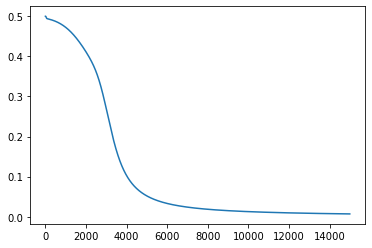

In [7]:
#Implementaion of XOR using MLP & EBP

import numpy as np
import matplotlib.pyplot as plt
X=np.array([[1,0,0],[1,0,1],[1,1,0],[1,1,1]])#First column represents bias

y=np.array([[0],[1],[1],[0]])

w1=np.random.randn(3,5) #initial weights
w2=np.random.randn(6,1)

lr=0.09  #learning rate
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_deriv(x):
    return sigmoid(x)*(1-sigmoid(x))

def forward(x,w1,w2,predict=False):#forward propagation function
    a1=np.matmul(x,w1)
    z1=sigmoid(a1)
    
    #create and add bias
    bias=np.ones((len(z1),1))
    z1=np.concatenate((bias,z1),axis=1)
    
    a2=np.matmul(z1,w2)
    z2=sigmoid(a2)
    
    if predict:
        return z2
    return a1,z1,a2,z2

def BackProp(a2,z0,z1,z2,y):#BackPropagation Function
    
    delta2=z2-y
    Delta2=np.matmul(z1.T,delta2)
    delta1=(delta2.dot(w2[1:,:].T))*sigmoid_deriv(a1)
    Delta1=np.matmul(z0.T,delta1)
    return Delta1,Delta2,delta2


cost=[]

epochs=15000   #init epochs

m=len(X)

#start training
for i in range(epochs):
    a1,z1,a2,z2=forward(X,w1,w2)   #forward
    
    Delta1,Delta2,delta2=BackProp(a2,X,z1,z2,y) #error backpropagation
    
    w1-=lr*(1/m)*Delta1
    w2-=lr*(1/m)*Delta2
    
    
    #cost list for plotting
    c=np.mean(np.abs(delta2))
    
    cost.append(c)
    
    
    if i%1000==0:
        print(f"Iteration:{i}.Error:{c}")
        
#training complete

print("Training Complete>>>")

#For making Predictions

z3=forward(X,w1,w2,True)

print("Percentages:")
print(z3)
print("\nPredictions:")
print(np.round(z3))


#plot costs

plt.plot(cost)
plt.show()

    
                 
